In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score


In [ ]:
#load datasets
diabetes_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bakare/diabetes.csv')
# A view of the datset
diabetes_df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Details about the dataset

In [ ]:
#identify the numerical values in the dataset
num_features = diabetes_df.dtypes[diabetes_df.dtypes != 'object'].index
print('Numerical features', len(num_features))#identify categorical values
categorical_features = diabetes_df.dtypes[diabetes_df.dtypes == 'object'].index
print('Categorical features', len(categorical_features))
print("Numerical features", diabetes_df[num_features].columns)
print("Categorical features", diabetes_df[categorical_features].columns)

Numerical features 1
Categorical features 16
Numerical features Index(['Age'], dtype='object')
Categorical features Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


#Some exploratory data analysis on the features


From the data exploration, we were able to identify the following:
1.   In figure 4.2, there are more male respondents than female respondents 4.2
2.   In Figure 4.3, there are almost equal number of persons with and without polyuria
3.  In Figure 4.4, there are approximately 240 patients have the Polydipsia condition in this dataset.
4.  In Figure 4.5, the Polyphagia condition is depicted alongside with sudden weight loss. We observed that almost all the respondents eat and hunger a lot. But this condition affects those who eat a lot and are still experienced sudden weight loss. This is common within the ages of 30 and 81.
5.It is clear in Figure 4.6, that a greater number of people do not have genital thrush. Furthermore, the majority of persons who have it are between the ages of 40 and 55. Only a few people are over the age of 80.








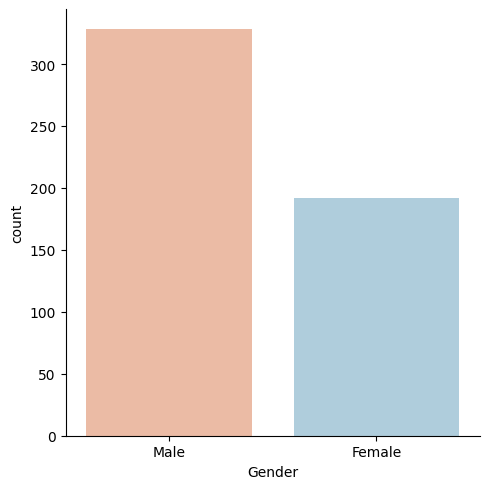

In [ ]:
# Feature: Gender
sns.catplot(x='Gender', kind="count", palette='RdBu',data=diabetes_df)

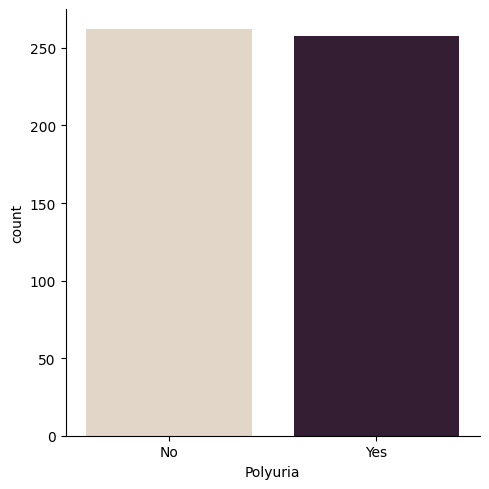

In [ ]:
# Feature: Polyuria
sns.catplot(x='Polyuria', kind="count", palette="ch:.25", data=diabetes_df)

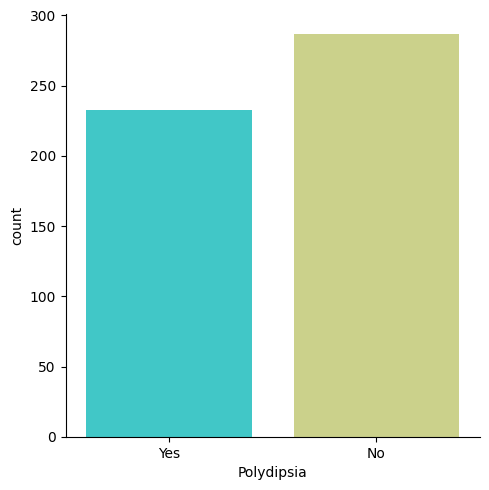

In [ ]:
# Feature: Polydipsia
sns.catplot(x='Polydipsia', kind="count", palette="rainbow", data=diabetes_df)

<Axes: xlabel='Polyphagia', ylabel='Age'>

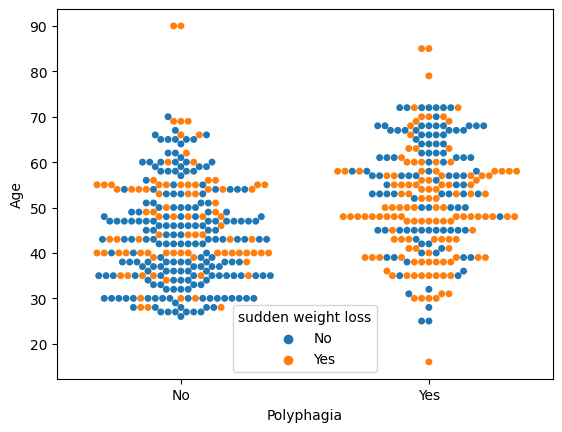

In [ ]:
# Features: Polyphagia and sudden weight loss
sns.swarmplot(x="Polyphagia", y="Age", hue='sudden weight loss', data=diabetes_df)

<Axes: xlabel='Genital thrush', ylabel='Age'>

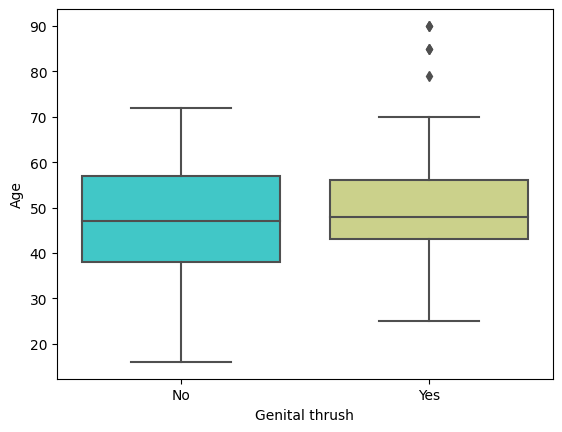

In [ ]:
# Feature: Genital thrush
sns.boxplot(x='Genital thrush',y='Age',data=diabetes_df,palette='rainbow')

In [ ]:
# Make copy to avoid changing original data 
label_df = diabetes_df.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categorical_features:
  label_df[col] = label_encoder.fit_transform(label_df[col])
diabetes_df =label_df

In [ ]:
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Then a heatmap

<Axes: >

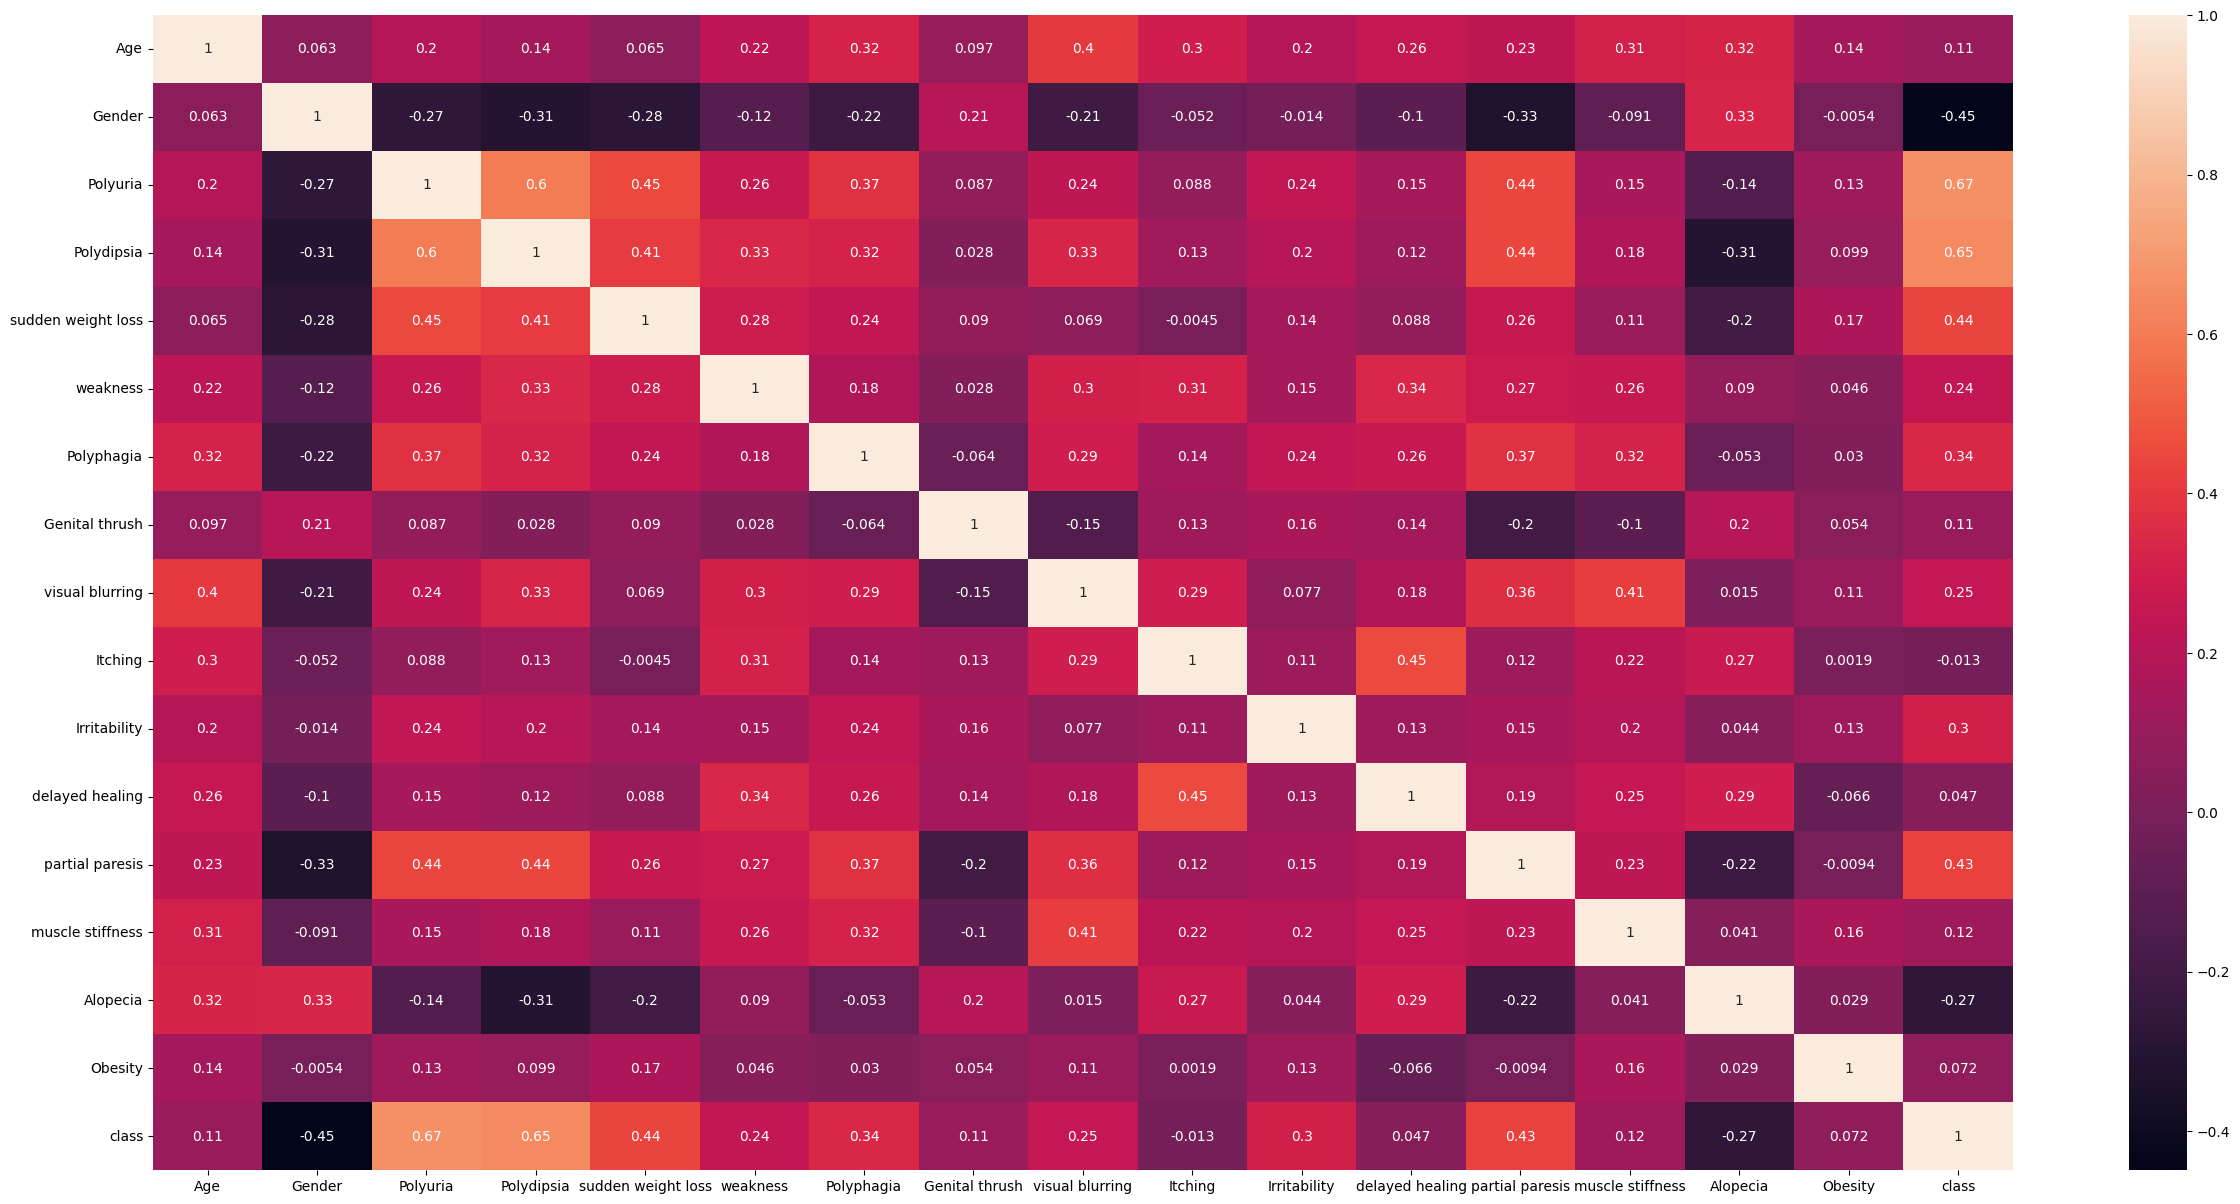

In [ ]:
plt.figure(figsize=(30,15))
correlation = diabetes_df.corr()
sns.heatmap(correlation, annot=True)

# Model Building

In [ ]:
#Select the target and input variables, y is the target, X is the input
y= label_df['class']
X= label_df.drop(['class'], 1)
# First divide the data set into training, testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.70, random_state=42, shuffle=True )
X_validation, X_test, y_validation, y_test = train_test_split(X_valid, y_valid,train_size=0.50, shuffle=True, random_state=42)

<ipython-input-47-6dc7be352d53>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= label_df.drop(['class'], 1)


#Models Training and Comparison

In [ ]:
classifiers=[]

#Random Forest 
rf = RandomForestClassifier()
classifiers.append(rf)

#SVM
sv = svm.SVC()
classifiers.append(sv)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
classifiers.append(knn)
'''
#LR
lr = LinearRegression()
classifiers.append(lr)
'''
#DT
dt =  DecisionTreeClassifier()
classifiers.append(dt)

#NB
nb = GaussianNB()
classifiers.append(nb)

for clf in classifiers:
  clf.fit(X_train, y_train)
  preds=clf.predict(X_validation)
  #METRICS
  acc = accuracy_score(y_validation, preds) *100
  mse = mean_squared_error(y_validation, preds)*100
  mae = mean_absolute_error(y_validation, preds)*100
  rmse = mean_squared_error(y_validation, preds, squared=False)*100
  #ps = precision_score(y_validation, preds)
  #rs = recall_score(y_validation, preds)
  #f1_s = f1_score(y_validation, preds)
  print("Mean Squared Error of %s is %s"%(clf, mse))
  print("Mean Absolute Error of %s is %s"%(clf, mae))
  print("Root Mean Squared Error of %s is %s"%(clf, rmse))
  #print("Precision Score of %s is %s"%(clf, ps))
  #print("Recall Score of %s is %s"%(clf, rs))
  #print("F1 Score of %s is %s"%(clf, f1_s))
  print("Accuracy of %s is %s"%(clf, acc))

Mean Squared Error of RandomForestClassifier() is 1.282051282051282
Mean Absolute Error of RandomForestClassifier() is 1.282051282051282
Root Mean Squared Error of RandomForestClassifier() is 11.322770341445958
Accuracy of RandomForestClassifier() is 98.71794871794873
Mean Squared Error of SVC() is 33.33333333333333
Mean Absolute Error of SVC() is 33.33333333333333
Root Mean Squared Error of SVC() is 57.735026918962575
Accuracy of SVC() is 66.66666666666666
Mean Squared Error of KNeighborsClassifier() is 10.256410256410255
Mean Absolute Error of KNeighborsClassifier() is 10.256410256410255
Root Mean Squared Error of KNeighborsClassifier() is 32.025630761017425
Accuracy of KNeighborsClassifier() is 89.74358974358975
Mean Squared Error of DecisionTreeClassifier() is 2.564102564102564
Mean Absolute Error of DecisionTreeClassifier() is 2.564102564102564
Root Mean Squared Error of DecisionTreeClassifier() is 16.012815380508712
Accuracy of DecisionTreeClassifier() is 97.43589743589743
Mean S

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
#Select the target and input variables, y is the target, X is the input
y= label_df['class']
X= label_df.drop(['class'], 1)
# First divide the data set into training, testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.70, random_state=42, shuffle=True )
X_validation, X_test, y_validation, y_test = train_test_split(X_valid, y_valid,train_size=0.50, shuffle=True, random_state=42 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(16,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=90, batch_size=32, verbose=1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print("Accuracy of ANN is :", accuracy)

predi = model.predict(X_validation)

mse = mean_squared_error(y_validation, predi)*100
mae = mean_absolute_error(y_validation, predi)*100
rmse = mean_squared_error(y_validation, predi, squared=False)*100
'''
ps = precision_score(y_validation, predi)
rs = recall_score(y_validation, predi)
f1_s = f1_score(y_validation, predi)
'''
print("mean squred error of %s is %s"%("ANN Model", mse))
print("Mean Absolute Error of %s is %s"%("ANN Model", mae))
print("Root Mean Squared Error of %s is %s"%("ANN Model", rmse))
'''
print("Precision Score of %s is %s"%("ANN Model", ps))
print("Recall Score of %s is %s"%("ANN Model", rs))
print("F1 Score of %s is %s"%("ANN Model", f1_s))
'''

Epoch 1/90


<ipython-input-49-8cd69d118129>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= label_df.drop(['class'], 1)


13/13 [==============================] - 1s 3ms/step - loss: 0.9492 - accuracy: 0.5312
Epoch 2/90
13/13 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.7019
Epoch 3/90
13/13 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7067
Epoch 4/90
13/13 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.8173
Epoch 5/90
13/13 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.8149
Epoch 6/90
13/13 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8438
Epoch 7/90
13/13 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8389
Epoch 8/90
13/13 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8293
Epoch 9/90
13/13 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8702
Epoch 10/90
13/13 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8798
Epoch 11/90
13/13 [===========

'\nprint("Precision Score of %s is %s"%("ANN Model", ps))\nprint("Recall Score of %s is %s"%("ANN Model", rs))\nprint("F1 Score of %s is %s"%("ANN Model", f1_s))\n'

Prediction using Random Effect model

In [ ]:
predictions_final=rf.predict(X_test)
accuracy_test=accuracy_score(y_test, predictions_final)
print('Accuracy of Random Forest Prediction is %s'%(accuracy_test))

Accuracy of Random Forest Prediction is 0.9903846153846154


In [ ]:
# Final Predictions
#Write results of predictions to csv file
predictions_file = pd.DataFrame({'Age': X_test['Age'],'Diabetes_indicator': predictions_final})
predictions_file.to_csv('diabetes.csv', index=False)
print("Done with predictions!")

Done with predictions!
